<a href="https://colab.research.google.com/github/Mang0725/-Exploratory-Data-Analysis-on-Amazon-Book-Selling/blob/main/bestselling_Amazon_Books_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import numpy as np
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo
from plotly.subplots import make_subplots


# Special Visualization
import wordcloud, missingno
from wordcloud import WordCloud # wordcloud
import missingno as msno # check missing value
import networkx as nx

In [ ]:
df=pd.read_csv("/content/bestsellers with categories.csv")
df.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Unnamed: 7
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,NaN
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,NaN
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,NaN
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,NaN
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,NaN
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,NaN
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,NaN
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,NaN
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,NaN
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,NaN


In [ ]:
df.isnull().sum()

Name             0
Author           0
User Rating      0
Reviews          0
Price            0
Year             0
Genre            0
Unnamed: 7     550
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
 7   Unnamed: 7   0 non-null      float64
dtypes: float64(2), int64(3), object(3)
memory usage: 34.5+ KB


In [ ]:
df.shape

(550, 8)

In [ ]:

df.sort_values('Reviews',ascending=False).head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Unnamed: 7
534,Where the Crawdads Sing,Delia Owens,4.8,87841,15,2019,Fiction,NaN
382,The Girl on the Train,Paula Hawkins,4.1,79446,18,2015,Fiction,NaN
383,The Girl on the Train,Paula Hawkins,4.1,79446,7,2016,Fiction,NaN
32,Becoming,Michelle Obama,4.8,61133,11,2018,Non Fiction,NaN
33,Becoming,Michelle Obama,4.8,61133,11,2019,Non Fiction,NaN
137,Gone Girl,Gillian Flynn,4.0,57271,9,2014,Fiction,NaN
135,Gone Girl,Gillian Flynn,4.0,57271,10,2012,Fiction,NaN
136,Gone Girl,Gillian Flynn,4.0,57271,10,2013,Fiction,NaN
368,The Fault in Our Stars,John Green,4.7,50482,13,2014,Fiction,NaN
367,The Fault in Our Stars,John Green,4.7,50482,7,2014,Fiction,NaN


In [ ]:
#there are 351 number of unique books
len(df.Name.value_counts())

351

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f74a4ef8dd0>,
      dtype=object)

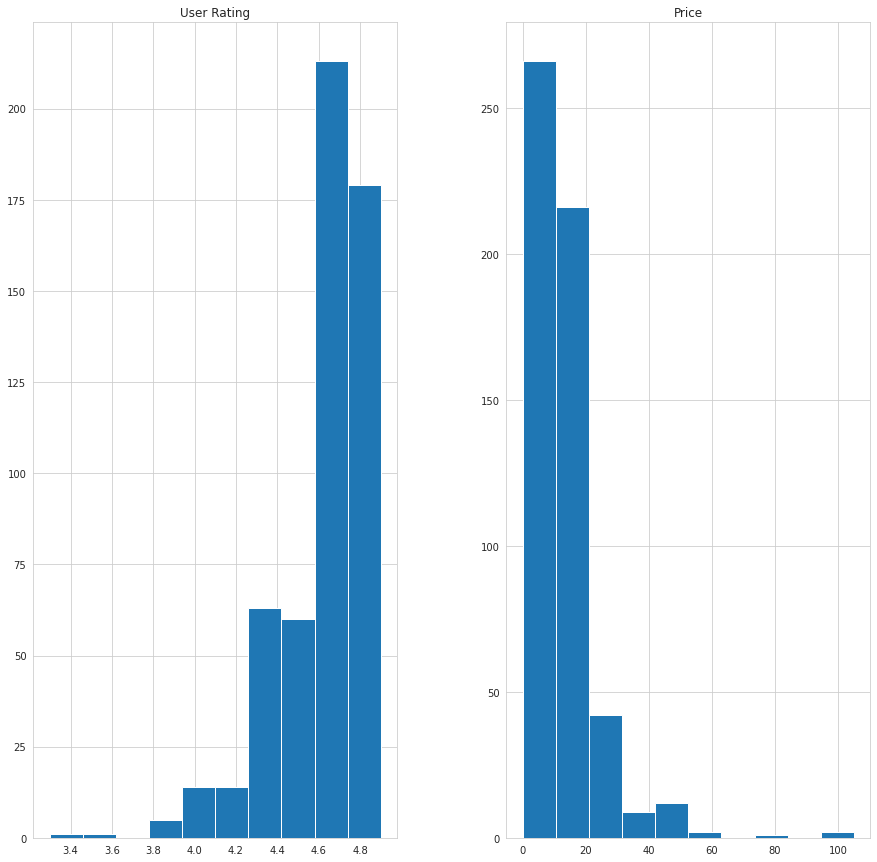

In [ ]:
df[["User Rating", "Price"]].hist()

In [ ]:

x=df[df["User Rating"]==4.9]
x.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Unnamed: 7
40,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2017,Fiction,NaN
41,"Brown Bear, Brown Bear, What Do You See?",Bill Martin Jr.,4.9,14344,5,2019,Fiction,NaN
81,Dog Man and Cat Kid: From the Creator of Capta...,Dav Pilkey,4.9,5062,6,2018,Fiction,NaN
82,Dog Man: A Tale of Two Kitties: From the Creat...,Dav Pilkey,4.9,4786,8,2017,Fiction,NaN
83,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2018,Fiction,NaN
84,Dog Man: Brawl of the Wild: From the Creator o...,Dav Pilkey,4.9,7235,4,2019,Fiction,NaN
85,Dog Man: Fetch-22: From the Creator of Captain...,Dav Pilkey,4.9,12619,8,2019,Fiction,NaN
86,Dog Man: For Whom the Ball Rolls: From the Cre...,Dav Pilkey,4.9,9089,8,2019,Fiction,NaN
87,Dog Man: Lord of the Fleas: From the Creator o...,Dav Pilkey,4.9,5470,6,2018,Fiction,NaN
146,"Goodnight, Goodnight Construction Site (Hardco...",Sherri Duskey Rinker,4.9,7038,7,2012,Fiction,NaN


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 146 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 146 missing from current font.



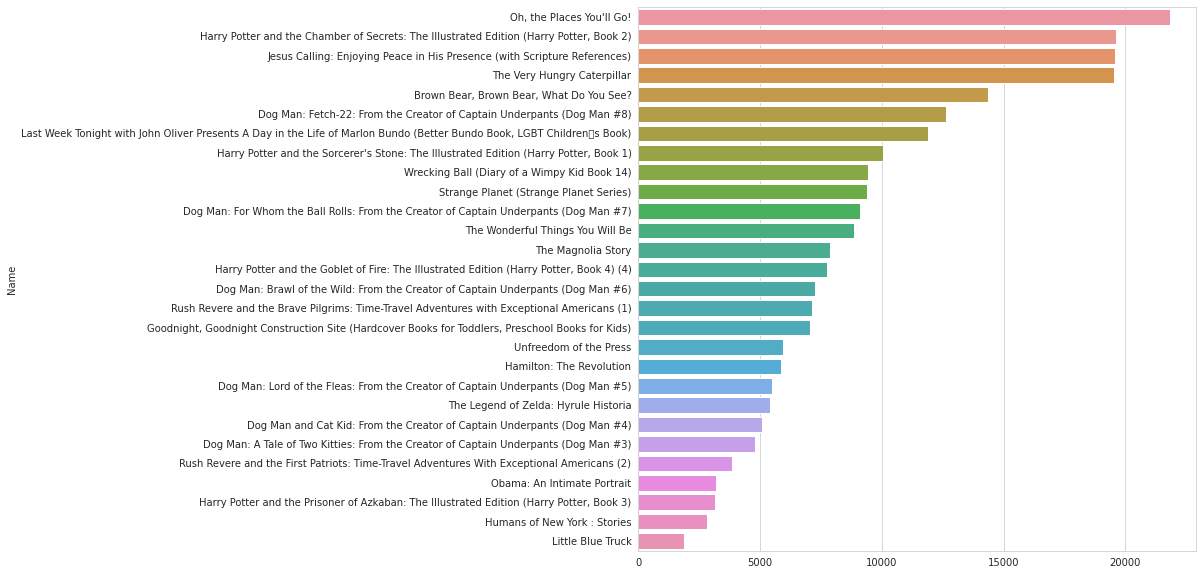

In [ ]:

y= x.groupby("Name").Reviews.mean().sort_values(ascending= False)
plt.figure(figsize= (10,10))
sns.set_style("whitegrid")
sns.barplot(y.values,y.index)

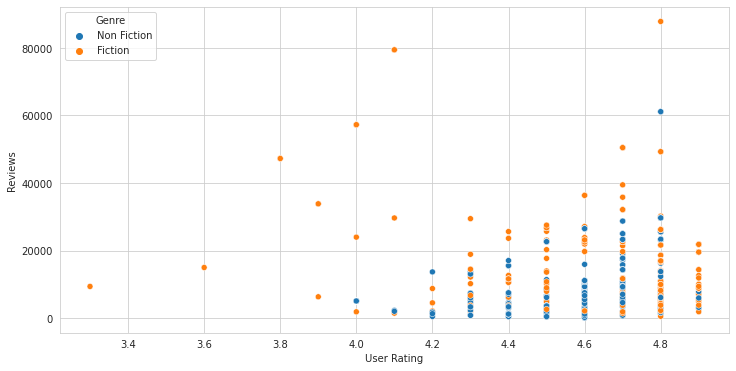

In [ ]:
#user ratings and reviews relation
plt.figure(figsize= (12,6))
sns.scatterplot(x="User Rating",y= "Reviews",data= df,hue= "Genre")

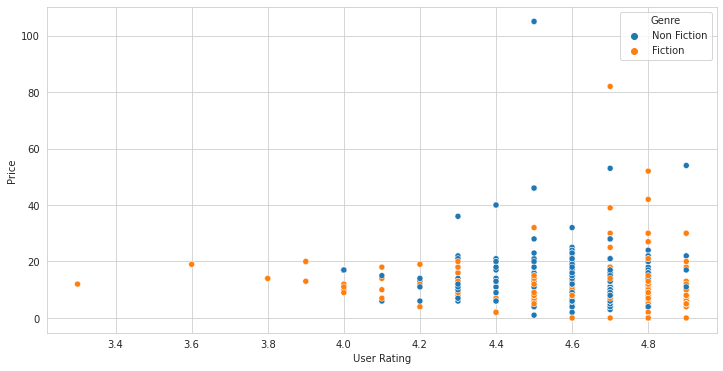

In [ ]:
#user ratings and reviews relation
plt.figure(figsize= (12,6))
sns.scatterplot(x="User Rating",y= "Price",data= df,hue= "Genre")

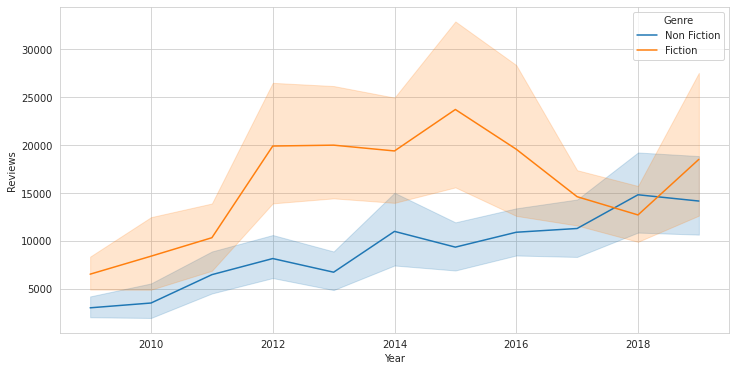

In [ ]:
#reviews over the years
plt.figure(figsize= (12,6))
sns.lineplot(x= "Year",y= "Reviews",data= df,hue="Genre")

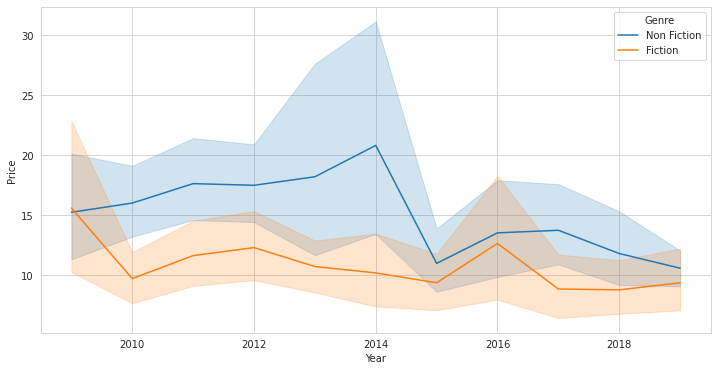

In [ ]:

#prices over the years
plt.figure(figsize= (12,6))
sns.lineplot(x= "Year",y= "Price",data= df,hue="Genre")

In [ ]:

#BESTSELLING BOOKS' AUTHORS:
temp_df1 = df.groupby('Author').count().reset_index().sort_values('Name',ascending=False).head(10)

In [ ]:
top = go.Bar(
                x = temp_df1['Author'],
                y = temp_df1['Name'],
                marker = dict(color = 'cyan',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
layout = go.Layout(template= "plotly_white",title = 'Top 10 Best-Selling Authors ' , 
                   xaxis = dict(title = 'Author',tickangle=45), yaxis = dict(title = 'count'))
fig = go.Figure(data = [top], layout = layout)
fig.show()

In [ ]:
df1 = df.groupby('Author').mean().sort_values('Reviews',ascending=False).reset_index().head(10)

fig = px.scatter(df1, x='User Rating', y='Reviews', color='Author')

fig.update_traces(marker=dict(size=10,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

df.head(20)

In [ ]:
Fiction = df[df["Genre"]=='Fiction']
Fiction.head(10)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Unnamed: 7
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,NaN
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,NaN
5,A Dance with Dragons (A Song of Ice and Fire),George R. R. Martin,4.4,12643,11,2011,Fiction,NaN
6,A Game of Thrones / A Clash of Kings / A Storm...,George R. R. Martin,4.7,19735,30,2014,Fiction,NaN
7,A Gentleman in Moscow: A Novel,Amor Towles,4.7,19699,15,2017,Fiction,NaN
9,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2016,Fiction,NaN
10,A Man Called Ove: A Novel,Fredrik Backman,4.6,23848,8,2017,Fiction,NaN
13,A Wrinkle in Time (Time Quintet),Madeleine L'Engle,4.5,5153,5,2018,Fiction,NaN
20,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2014,Fiction,NaN
21,All the Light We Cannot See,Anthony Doerr,4.6,36348,14,2015,Fiction,NaN


In [ ]:
Non_Fiction = df[df["Genre"]=='Non Fiction']
Non_Fiction.head(20)

,Name,Author,User Rating,Reviews,Price,Year,Genre,Unnamed: 7
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,NaN
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,NaN
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,NaN
8,"A Higher Loyalty: Truth, Lies, and Leadership",James Comey,4.7,5983,3,2018,Non Fiction,NaN
11,A Patriot's History of the United States: From...,Larry Schweikart,4.6,460,2,2010,Non Fiction,NaN
12,A Stolen Life: A Memoir,Jaycee Dugard,4.6,4149,32,2011,Non Fiction,NaN
14,"Act Like a Lady, Think Like a Man: What Men Re...",Steve Harvey,4.6,5013,17,2009,Non Fiction,NaN
15,Adult Coloring Book Designs: Stress Relief Col...,Adult Coloring Book Designs,4.5,2313,4,2016,Non Fiction,NaN
16,Adult Coloring Book: Stress Relieving Animal D...,Blue Star Coloring,4.6,2925,6,2015,Non Fiction,NaN
17,Adult Coloring Book: Stress Relieving Patterns,Blue Star Coloring,4.4,2951,6,2015,Non Fiction,NaN


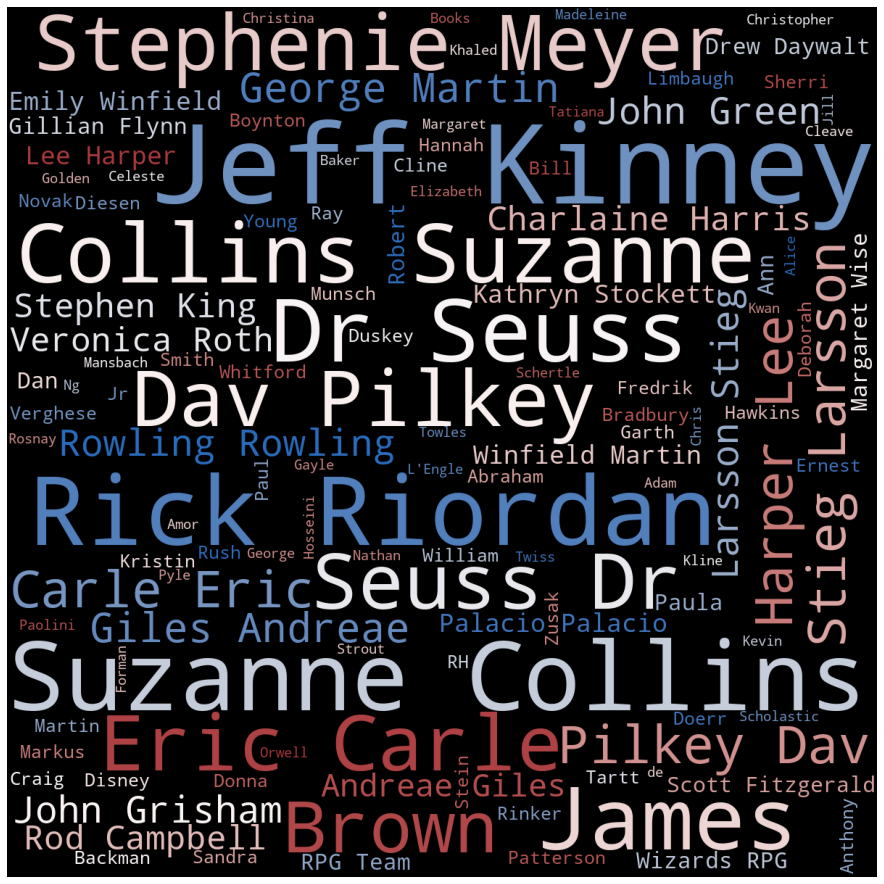

In [ ]:
from wordcloud import WordCloud

text=' '.join(Fiction['Author'])

plt.rcParams['figure.figsize']=(16,16)
wordcloud=WordCloud(background_color='black', colormap='vlag', 
                    width=1200, height=1200, max_words=121).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

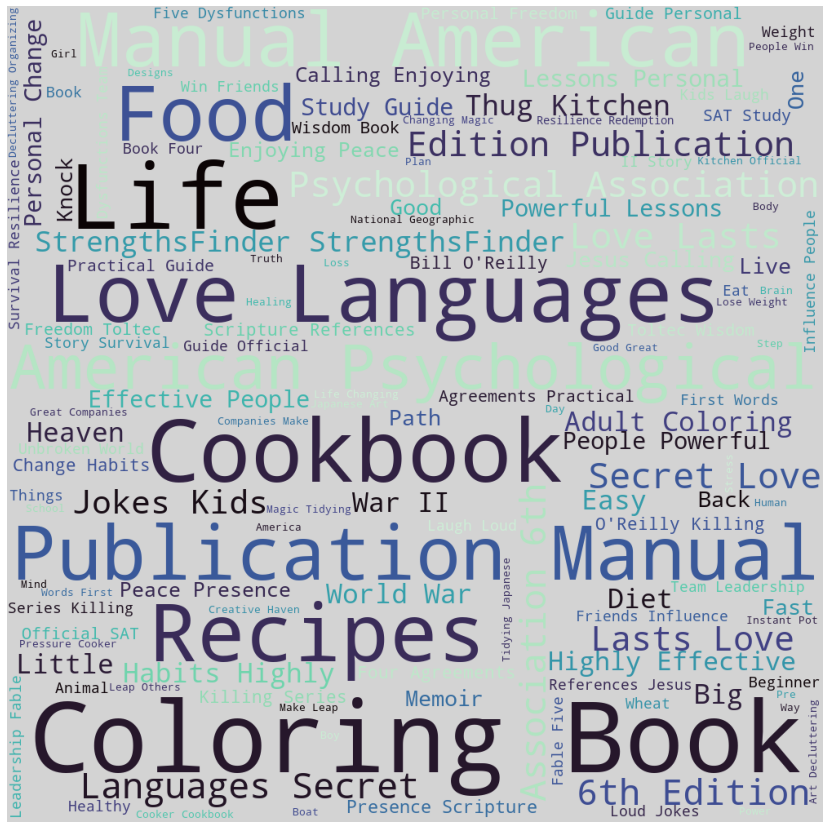

In [ ]:
from wordcloud import WordCloud

text=' '.join(Non_Fiction['Name'])

plt.rcParams['figure.figsize']=(15,15)
wordcloud=WordCloud(background_color='lightgrey', colormap='mako', 
                    width=1000, height=10
                    00, max_words=134).generate(text)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()



these names of nonfiction books like by peoples
